In [1]:
import pandas, numpy, seaborn, sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

## functions & options


In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [ ]:
# %%time
# #Download the big expression data with all the transcripts
# path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm.tsv"
# df = pandas.read_csv(path, sep = "\t", index_col='sample')

# print(df.shape)
# df.head()

In [ ]:
# # put ATG7_1 and ATG7_2 on the top
# isoforms_extract = df.loc[["ENST00000354449.7", "ENST00000354956.9"]]
# df = pandas.concat([isoforms_extract, df], axis=0)
# df.shape

In [ ]:
# %%time
#remove duplicate
# print(df.shape)
# print('number of duplicated gene is', len(df.loc[df.index.duplicated()]))

# df = df[~df.index.duplicated(keep = 'first')]
# print(df.shape)
# df.head()

In [ ]:
# #Save to csv to have the two ATG7 isoforms in the top of the dataframe
# path = "/xenabrowser_brut_data/all_transcripts/"
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm.tsv',sep = "\t")

In [ ]:
# # 30% of the transcrits of the data
# df = df.iloc[:59112,:2358]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_30perc.tsv',sep = "\t")

# # 10% of the transcrits of the data
# df = df.iloc[:19704,:786]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_10perc.tsv',sep = "\t")

# #Do a subset to practice and save it
# # 1% of the transcrits of the data
# df = df.iloc[:1970,:78]
# df.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_1perc.tsv',sep = "\t")

In [ ]:
%%time
#Download 30% of the big expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_30perc.tsv"
df = pandas.read_csv(path, sep = "\t")

print(df.shape)
df.set_index('sample', inplace = True)
df.index.name = None
df.head()

In [ ]:
#Calcul to have value from log2;
df = 2**df
df = numpy.log2(df+1)
df.head()

In [ ]:
genes = "ENST00000354449.7", "ENST00000354956.9"
g_names = "ATG7_1", "ATG7_2"
for i in range(len(genes)):
    print(f'{g_names[i]}: {df.loc[genes[i], :].sum()}')

In [ ]:
ATG7_2_sum = 3938.4010

print('shape before filtering', df.shape)
#create boolean and select the genes where sum is higher than ATG7(2) sum expression
bool_higher_iso2 = df.sum(axis=1) > ATG7_2_sum 
df = df[bool_higher_iso2]

print('shape after filtering', df.shape)

In [ ]:
%%time
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 20))
number_clust_L = [] 
goodness_chs_L = []
goodness_dbi_L = []
for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(df)
    labels = kmeans_model.labels_
    goodness_chs = metrics.calinski_harabasz_score(df, labels)
    goodness_dbi = metrics.davies_bouldin_score(df, labels)
    
    #save score in list
    number_clust_L.append(nb)
    goodness_chs_L.append(goodness_chs)
    goodness_dbi_L.append(goodness_dbi)

#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, Goodness_DBI = goodness_dbi_L)
df_goodness = pandas.DataFrame.from_dict(d, orient='columns')
df_goodness.head()

In [ ]:
#plot the Goodness on the number to determine the best one.
##calinski_harabasz_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_CHS', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the elbow curve is at between 6 and 12')

In [ ]:
#davies_bouldin_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_DBI', marker="o")
plt.grid(ls=':', alpha = 0.5)
print('the plateau start at 7')

# Practice for graph. Start here with 1%

In [24]:
%%time
#Download 1% of the big expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_1perc.tsv"
df = pandas.read_csv(path, sep = "\t")

print(df.shape)
df.set_index('sample', inplace = True)
df.index.name = None
df.head()

(1970, 79)
Wall time: 30.9 ms


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-ZPU1-2126-SM-57WED,GTEX-X585-0008-SM-46MU4,GTEX-139T8-0011-R1a-SM-5HL75,GTEX-S4UY-0426-SM-3K2AF,GTEX-12WSD-2826-SM-59HKT,GTEX-NPJ7-0011-R6a-SM-2I3G7,GTEX-UPIC-1726-SM-4IHKG,GTEX-WZTO-0626-SM-4PQYY,GTEX-XPT6-0006-SM-4B66Q,GTEX-Y9LG-0226-SM-4VBS4
ENST00000354449.7,1.2467,2.9134,2.5451,2.9667,1.2556,3.1329,1.7870,2.8701,2.7255,0.9640,...,2.3961,2.8549,0.9689,2.6792,3.5903,2.4345,1.8861,0.4218,1.0670,3.0277
ENST00000354956.9,1.6273,0.9062,-2.1677,-1.0095,-2.0883,-9.9658,1.0377,1.7143,1.2445,-0.7949,...,3.3352,2.4379,-4.7131,0.4587,-2.6437,-3.0233,1.1900,-9.9658,2.0224,-0.4168
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,1.5700,-9.9658,-9.9658,-9.9658,-0.7532,-1.7434,-9.9658,-9.9658,-3.2728,-2.5601
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,-0.0154,2.2611,-9.9658,0.7065,0.4837,-9.9658,0.4649,-9.9658,-2.3068,0.7577
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [25]:
# 10 is the best number of cluster
kmeans_model = KMeans(n_clusters = 9, random_state=1).fit(df)
labels = kmeans_model.labels_
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(df)
print(pred_cluster)
#add the prediction in a column
df['cluster'] = pred_cluster
df.head()

[1 2 8 ... 4 5 1]


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-X585-0008-SM-46MU4,GTEX-139T8-0011-R1a-SM-5HL75,GTEX-S4UY-0426-SM-3K2AF,GTEX-12WSD-2826-SM-59HKT,GTEX-NPJ7-0011-R6a-SM-2I3G7,GTEX-UPIC-1726-SM-4IHKG,GTEX-WZTO-0626-SM-4PQYY,GTEX-XPT6-0006-SM-4B66Q,GTEX-Y9LG-0226-SM-4VBS4,cluster
ENST00000354449.7,1.2467,2.9134,2.5451,2.9667,1.2556,3.1329,1.7870,2.8701,2.7255,0.9640,...,2.8549,0.9689,2.6792,3.5903,2.4345,1.8861,0.4218,1.0670,3.0277,1
ENST00000354956.9,1.6273,0.9062,-2.1677,-1.0095,-2.0883,-9.9658,1.0377,1.7143,1.2445,-0.7949,...,2.4379,-4.7131,0.4587,-2.6437,-3.0233,1.1900,-9.9658,2.0224,-0.4168,2
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-9.9658,-9.9658,-9.9658,-0.7532,-1.7434,-9.9658,-9.9658,-3.2728,-2.5601,8
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,2.2611,-9.9658,0.7065,0.4837,-9.9658,0.4649,-9.9658,-2.3068,0.7577,4
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,6


In [22]:
#to select the good color map scale
print('max is', df.max().max())
print('min is', df.min().min())

max is 14.1704
min is -9.9658


In [26]:
#ATG7 is not in the list
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

print(df['cluster'][[ATG7_1, ATG7_2]])

ENST00000354449.7    1
ENST00000354956.9    2
Name: cluster, dtype: int32


In [6]:
'The two genes are not in the same cluster. They are different'

'The two genes are not in the same cluster. They are different'

In [27]:
seaborn.hls_palette(9)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6554666666666664)]

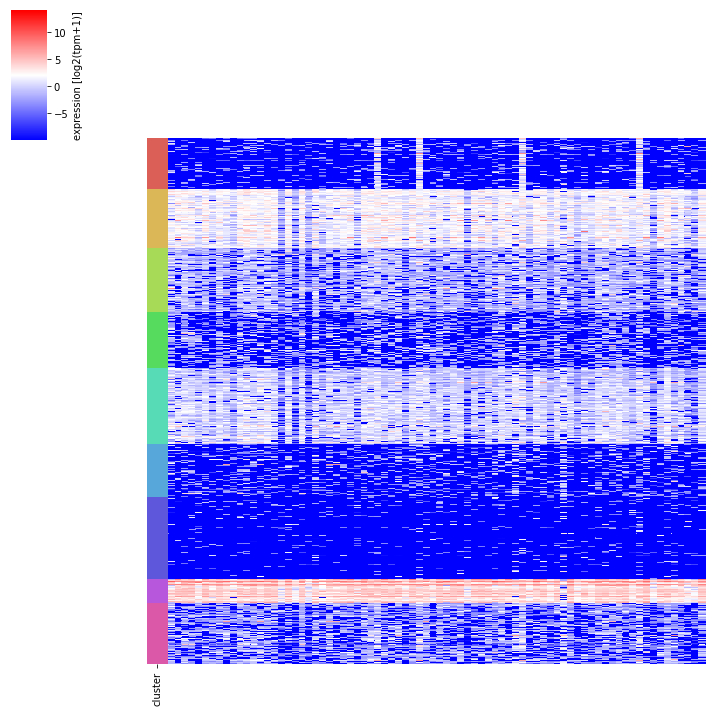

In [29]:
#sort the df with the cluster numbers.
df = df.sort_values('cluster')
#pop the cluster column
cluster_uniq = df.pop("cluster")
#use one color per cluster group (here 7)
lut = dict(zip(cluster_uniq.unique(), seaborn.hls_palette(9)))
row_colors_clust = cluster_uniq.map(lut)
#plot
seaborn.clustermap(df, cmap='bwr', col_cluster=False, row_cluster=False,
                   row_colors= row_colors_clust, 
                   method = "centroid", metric = 'cosine',
                   yticklabels= '', xticklabels = '',
                   cbar_kws={'label':'expression [log2(tpm+1)]'})